In [1]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns


from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from datetime import datetime, timedelta, date


In [2]:
pwd

'/Users/iremaltiner/Desktop/ErdosProject/Bootcamp Project'

# Load

In [3]:
load = pd.read_csv('/Users/iremaltiner/Desktop/ErdosProject/ExecutiveHour/rouz/data/dat_set_3/market_data_actual_load.csv')
load = load.drop(['label', 'type'], axis=1)
load.columns = ['Time', 'Actual Load']
load.head(10)

,Time,Actual Load
0,2020-10-27 00:05,4377.0
1,2020-10-27 00:10,4300.0
2,2020-10-27 00:15,4308.0
3,2020-10-27 00:20,4297.0
4,2020-10-27 00:25,4263.0
5,2020-10-27 00:30,4251.0
6,2020-10-27 00:35,4232.0
7,2020-10-27 00:40,4231.0
8,2020-10-27 00:45,4179.0
9,2020-10-27 00:50,4175.0


In [4]:
load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329074 entries, 0 to 329073
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Time         329074 non-null  object 
 1   Actual Load  322541 non-null  float64
dtypes: float64(1), object(1)
memory usage: 5.0+ MB


In [5]:
load.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)
load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329074 entries, 0 to 329073
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Time         329074 non-null  object 
 1   Actual Load  329074 non-null  float64
dtypes: float64(1), object(1)
memory usage: 5.0+ MB


In [6]:
load['Time'] = pd.to_datetime(load['Time'])
load['Date'] = load['Time'].apply(lambda x: x.date())
load['Date'] = pd.to_datetime(load['Date'])
load.head()

,Time,Actual Load,Date
0,2020-10-27 00:05:00,4377.0,2020-10-27
1,2020-10-27 00:10:00,4300.0,2020-10-27
2,2020-10-27 00:15:00,4308.0,2020-10-27
3,2020-10-27 00:20:00,4297.0,2020-10-27
4,2020-10-27 00:25:00,4263.0,2020-10-27


In [7]:
date_range = pd.date_range(start='2020-09-01', end='2023-12-01')
cal = calendar()
holidays = cal.holidays(start=date_range.min(), end=date_range.max())
load['Holiday'] = load['Date'].isin(holidays).astype('int')
load = load[['Time', 'Date', 'Holiday', 'Actual Load']]
load.head()

,Time,Date,Holiday,Actual Load
0,2020-10-27 00:05:00,2020-10-27,0,4377.0
1,2020-10-27 00:10:00,2020-10-27,0,4300.0
2,2020-10-27 00:15:00,2020-10-27,0,4308.0
3,2020-10-27 00:20:00,2020-10-27,0,4297.0
4,2020-10-27 00:25:00,2020-10-27,0,4263.0


In [8]:
load['Hour'] = load['Time'].dt.strftime("%H").astype('int')
load['Minute'] = load['Time'].dt.strftime("%M").astype('int')
load = load[['Time', 'Date', 'Hour', 'Minute', 'Holiday', 'Actual Load']]
load.head()

,Time,Date,Hour,Minute,Holiday,Actual Load
0,2020-10-27 00:05:00,2020-10-27,0,5,0,4377.0
1,2020-10-27 00:10:00,2020-10-27,0,10,0,4300.0
2,2020-10-27 00:15:00,2020-10-27,0,15,0,4308.0
3,2020-10-27 00:20:00,2020-10-27,0,20,0,4297.0
4,2020-10-27 00:25:00,2020-10-27,0,25,0,4263.0


In [9]:
load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329074 entries, 0 to 329073
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Time         329074 non-null  datetime64[ns]
 1   Date         329074 non-null  datetime64[ns]
 2   Hour         329074 non-null  int64         
 3   Minute       329074 non-null  int64         
 4   Holiday      329074 non-null  int64         
 5   Actual Load  329074 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 15.1 MB


In [10]:
new_load = load[load['Minute'] == 0]
new_load = new_load.reset_index(drop=True)
new_load

,Time,Date,Hour,Minute,Holiday,Actual Load
0,2020-10-27 01:00:00,2020-10-27,1,0,0,4137.0
1,2020-10-27 02:00:00,2020-10-27,2,0,0,3984.0
2,2020-10-27 03:00:00,2020-10-27,3,0,0,3895.0
3,2020-10-27 04:00:00,2020-10-27,4,0,0,3866.0
4,2020-10-27 05:00:00,2020-10-27,5,0,0,3909.0
...,...,...,...,...,...,...
26854,2023-10-27 11:00:00,2023-10-27,11,0,0,5755.0
26855,2023-10-27 12:00:00,2023-10-27,12,0,0,5753.0
26856,2023-10-27 13:00:00,2023-10-27,13,0,0,5796.0
26857,2023-10-27 14:00:00,2023-10-27,14,0,0,5783.0


In [11]:
new_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26859 entries, 0 to 26858
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Time         26859 non-null  datetime64[ns]
 1   Date         26859 non-null  datetime64[ns]
 2   Hour         26859 non-null  int64         
 3   Minute       26859 non-null  int64         
 4   Holiday      26859 non-null  int64         
 5   Actual Load  26859 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 1.2 MB


In [12]:
new_load.drop_duplicates(keep='first', subset=['Time'], inplace=True)
new_load.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26276 entries, 0 to 26858
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Time         26276 non-null  datetime64[ns]
 1   Date         26276 non-null  datetime64[ns]
 2   Hour         26276 non-null  int64         
 3   Minute       26276 non-null  int64         
 4   Holiday      26276 non-null  int64         
 5   Actual Load  26276 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 1.4 MB


In [13]:
new_load.head(10)

,Time,Date,Hour,Minute,Holiday,Actual Load
0,2020-10-27 01:00:00,2020-10-27,1,0,0,4137.0
1,2020-10-27 02:00:00,2020-10-27,2,0,0,3984.0
2,2020-10-27 03:00:00,2020-10-27,3,0,0,3895.0
3,2020-10-27 04:00:00,2020-10-27,4,0,0,3866.0
4,2020-10-27 05:00:00,2020-10-27,5,0,0,3909.0
5,2020-10-27 06:00:00,2020-10-27,6,0,0,4121.0
6,2020-10-27 07:00:00,2020-10-27,7,0,0,4547.0
7,2020-10-27 08:00:00,2020-10-27,8,0,0,4976.0
8,2020-10-27 09:00:00,2020-10-27,9,0,0,5271.0
9,2020-10-27 10:00:00,2020-10-27,10,0,0,5448.0


# Real Time Price

In [14]:
real_time = pd.read_csv('/Users/iremaltiner/Desktop/ErdosProject/ExecutiveHour/rouz/data/dat_set_3/market_data_real_time.csv',
                       parse_dates=['time'])
real_time = real_time.drop(['label', 'type'], axis=1)
real_time.columns = ['Time', 'Real Time Price']
real_time.head()

,Time,Real Time Price
0,2020-10-27 00:00:00,26.20
1,2020-10-27 00:05:00,24.15
2,2020-10-27 00:10:00,30.45
3,2020-10-27 00:15:00,29.93
4,2020-10-27 00:20:00,23.17


In [15]:
real_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324144 entries, 0 to 324143
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Time             324144 non-null  datetime64[ns]
 1   Real Time Price  324144 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.9 MB


In [16]:
real_time['Time'] = pd.to_datetime(real_time['Time'])
real_time['Date'] = real_time['Time'].apply(lambda x: x.date())
real_time['Date'] = pd.to_datetime(load['Date'])
real_time.head()

,Time,Real Time Price,Date
0,2020-10-27 00:00:00,26.20,2020-10-27
1,2020-10-27 00:05:00,24.15,2020-10-27
2,2020-10-27 00:10:00,30.45,2020-10-27
3,2020-10-27 00:15:00,29.93,2020-10-27
4,2020-10-27 00:20:00,23.17,2020-10-27


In [17]:
date_range = pd.date_range(start='2020-09-01', end='2023-12-01')
cal = calendar()
holidays = cal.holidays(start=date_range.min(), end=date_range.max())
real_time['Holiday'] = real_time['Date'].isin(holidays).astype('int')
real_time = real_time[['Time', 'Date', 'Holiday', 'Real Time Price']]
real_time.head()

,Time,Date,Holiday,Real Time Price
0,2020-10-27 00:00:00,2020-10-27,0,26.20
1,2020-10-27 00:05:00,2020-10-27,0,24.15
2,2020-10-27 00:10:00,2020-10-27,0,30.45
3,2020-10-27 00:15:00,2020-10-27,0,29.93
4,2020-10-27 00:20:00,2020-10-27,0,23.17


In [18]:
real_time['Hour'] = real_time['Time'].dt.strftime("%H").astype('int')
real_time['Minute'] = real_time['Time'].dt.strftime("%M").astype('int')
real_time = real_time[['Time', 'Date', 'Hour', 'Minute', 'Holiday', 'Real Time Price']]
real_time.head()

,Time,Date,Hour,Minute,Holiday,Real Time Price
0,2020-10-27 00:00:00,2020-10-27,0,0,0,26.20
1,2020-10-27 00:05:00,2020-10-27,0,5,0,24.15
2,2020-10-27 00:10:00,2020-10-27,0,10,0,30.45
3,2020-10-27 00:15:00,2020-10-27,0,15,0,29.93
4,2020-10-27 00:20:00,2020-10-27,0,20,0,23.17


In [19]:
real_time = real_time[real_time['Minute']==0]
real_time.head()

,Time,Date,Hour,Minute,Holiday,Real Time Price
0,2020-10-27 00:00:00,2020-10-27,0,0,0,26.20
12,2020-10-27 01:00:00,2020-10-27,1,0,0,29.69
28,2020-10-27 02:00:00,2020-10-27,2,0,0,22.83
42,2020-10-27 03:00:00,2020-10-27,3,0,0,21.00
54,2020-10-27 04:00:00,2020-10-27,4,0,0,21.90


In [20]:
real_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26402 entries, 0 to 324143
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Time             26402 non-null  datetime64[ns]
 1   Date             26402 non-null  datetime64[ns]
 2   Hour             26402 non-null  int64         
 3   Minute           26402 non-null  int64         
 4   Holiday          26402 non-null  int64         
 5   Real Time Price  26402 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 1.4 MB


# Day Ahead Price

In [21]:
day_ahead = pd.read_csv('/Users/iremaltiner/Desktop/ErdosProject/ExecutiveHour/rouz/data/dat_set_3/market_data_day_ahead.csv',
                       parse_dates=['time'])
day_ahead = day_ahead.drop(['label', 'type'], axis=1)
day_ahead.columns = ['Time', 'Day Ahead Price']
day_ahead.head()

,Time,Day Ahead Price
0,2020-10-27 00:00:00,18.44
1,2020-10-27 01:00:00,17.83
2,2020-10-27 02:00:00,16.44
3,2020-10-27 03:00:00,15.45
4,2020-10-27 04:00:00,16.51


In [22]:
day_ahead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26328 entries, 0 to 26327
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Time             26328 non-null  datetime64[ns]
 1   Day Ahead Price  26328 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 411.5 KB


# Merge Electricity Load-Price Data

In [23]:
elec_data = pd.merge(new_load,real_time, how='inner', on='Time')
elec_data = pd.merge(elec_data,day_ahead, how='inner', on='Time')
elec_data

,Time,Date_x,Hour_x,Minute_x,Holiday_x,Actual Load,Date_y,Hour_y,Minute_y,Holiday_y,Real Time Price,Day Ahead Price
0,2020-10-27 01:00:00,2020-10-27,1,0,0,4137.0,2020-10-27,1,0,0,29.69,17.83
1,2020-10-27 02:00:00,2020-10-27,2,0,0,3984.0,2020-10-27,2,0,0,22.83,16.44
2,2020-10-27 03:00:00,2020-10-27,3,0,0,3895.0,2020-10-27,3,0,0,21.00,15.45
3,2020-10-27 04:00:00,2020-10-27,4,0,0,3866.0,2020-10-27,4,0,0,21.90,16.51
4,2020-10-27 05:00:00,2020-10-27,5,0,0,3909.0,2020-10-27,5,0,0,23.19,17.04
...,...,...,...,...,...,...,...,...,...,...,...,...
26267,2023-10-27 11:00:00,2023-10-27,11,0,0,5755.0,2023-10-10,11,0,0,31.53,22.72
26268,2023-10-27 12:00:00,2023-10-27,12,0,0,5753.0,2023-10-10,12,0,0,31.38,21.71
26269,2023-10-27 13:00:00,2023-10-27,13,0,0,5796.0,2023-10-10,13,0,0,33.25,21.22
26270,2023-10-27 14:00:00,2023-10-27,14,0,0,5783.0,2023-10-10,14,0,0,29.64,19.30


In [24]:
elec_data = elec_data.drop(['Date_y', 'Hour_y', 'Minute_y', 'Holiday_y'], axis=1)

In [25]:
elec_data.columns = ['Time', 'Date', 'Hour', 'Minute', 'Holiday', 'Actual Load', 
                       'Real Time Price', 'Day Ahead Price']
elec_data = elec_data[['Time', 'Date', 'Hour', 'Minute', 'Holiday', 'Actual Load', 
                       'Day Ahead Price', 'Real Time Price']]
elec_data['Time'] = elec_data['Time'].dt.tz_localize('UTC')
elec_data.head()

,Time,Date,Hour,Minute,Holiday,Actual Load,Day Ahead Price,Real Time Price
0,2020-10-27 01:00:00+00:00,2020-10-27,1,0,0,4137.0,17.83,29.69
1,2020-10-27 02:00:00+00:00,2020-10-27,2,0,0,3984.0,16.44,22.83
2,2020-10-27 03:00:00+00:00,2020-10-27,3,0,0,3895.0,15.45,21.00
3,2020-10-27 04:00:00+00:00,2020-10-27,4,0,0,3866.0,16.51,21.90
4,2020-10-27 05:00:00+00:00,2020-10-27,5,0,0,3909.0,17.04,23.19


# Weather

In [26]:
nyc_weather = pd.read_csv('/Users/iremaltiner/Desktop/ErdosProject/ExecutiveHour/NYC_weather_data.csv',
                         parse_dates=['dtime'])
nyc_weather.head()

,index,temp,dwpt,rhum,prcp,wdir,wspd,pres,coco,dtime,...,weekly_Prec_anom,monthly_Prec_anom,weekly_Wind_anom,monthly_Wind_anom,weekly_Pressure_anom,monthly_Pressure_anom,snowing,raining,hail,cloudy
0,0,10.4,8.6,89.2,0.2,50.0,15.6,1023.6,5.5,2020-10-26 00:00:00-05:00,...,0.185261,-0.04199,1.081601,0.622146,0.324112,1.111573,0,0,0,1
1,1,10.6,8.9,89.5,0.2,40.0,13.7,1023.5,6.3,2020-10-26 01:00:00-05:00,...,0.185261,-0.04199,0.732361,0.315140,0.305731,1.095415,0,1,0,1
2,2,10.6,9.3,91.7,0.2,24.0,15.2,1023.3,6.3,2020-10-26 02:00:00-05:00,...,0.185261,-0.04199,1.008077,0.557513,0.268969,1.063098,0,1,0,1
3,3,10.8,9.8,93.5,0.2,46.0,13.6,1022.8,6.0,2020-10-26 03:00:00-05:00,...,0.185261,-0.04199,0.713980,0.298982,0.177064,0.982307,0,0,0,1
4,4,11.1,10.0,92.8,0.2,46.0,13.4,1022.6,6.5,2020-10-26 04:00:00-05:00,...,0.185261,-0.04199,0.677218,0.266665,0.140301,0.949991,0,1,0,1


In [27]:
nyc_weather = nyc_weather[['dtime','index', 'temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres', 'coco',
                           'week', 'month', 'weekly_T_anom', 'monthly_T_anom',
       'weekly_Prec_anom', 'monthly_Prec_anom', 'weekly_Wind_anom',
       'monthly_Wind_anom', 'weekly_Pressure_anom', 'monthly_Pressure_anom',
       'snowing', 'raining', 'hail', 'cloudy']]
nyc_weather.columns = ['Time','index', 'temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres', 'coco',
                           'week', 'month', 'weekly_T_anom', 'monthly_T_anom',
       'weekly_Prec_anom', 'monthly_Prec_anom', 'weekly_Wind_anom',
       'monthly_Wind_anom', 'weekly_Pressure_anom', 'monthly_Pressure_anom',
       'snowing', 'raining', 'hail', 'cloudy']
nyc_weather = nyc_weather.drop('index', axis=1)
nyc_weather.head()

,Time,temp,dwpt,rhum,prcp,wdir,wspd,pres,coco,week,...,weekly_Prec_anom,monthly_Prec_anom,weekly_Wind_anom,monthly_Wind_anom,weekly_Pressure_anom,monthly_Pressure_anom,snowing,raining,hail,cloudy
0,2020-10-26 00:00:00-05:00,10.4,8.6,89.2,0.2,50.0,15.6,1023.6,5.5,44,...,0.185261,-0.04199,1.081601,0.622146,0.324112,1.111573,0,0,0,1
1,2020-10-26 01:00:00-05:00,10.6,8.9,89.5,0.2,40.0,13.7,1023.5,6.3,44,...,0.185261,-0.04199,0.732361,0.315140,0.305731,1.095415,0,1,0,1
2,2020-10-26 02:00:00-05:00,10.6,9.3,91.7,0.2,24.0,15.2,1023.3,6.3,44,...,0.185261,-0.04199,1.008077,0.557513,0.268969,1.063098,0,1,0,1
3,2020-10-26 03:00:00-05:00,10.8,9.8,93.5,0.2,46.0,13.6,1022.8,6.0,44,...,0.185261,-0.04199,0.713980,0.298982,0.177064,0.982307,0,0,0,1
4,2020-10-26 04:00:00-05:00,11.1,10.0,92.8,0.2,46.0,13.4,1022.6,6.5,44,...,0.185261,-0.04199,0.677218,0.266665,0.140301,0.949991,0,1,0,1


In [28]:
nyc_weather['Time'] = nyc_weather['Time'].dt.tz_convert('UTC')
nyc_weather.head()

,Time,temp,dwpt,rhum,prcp,wdir,wspd,pres,coco,week,...,weekly_Prec_anom,monthly_Prec_anom,weekly_Wind_anom,monthly_Wind_anom,weekly_Pressure_anom,monthly_Pressure_anom,snowing,raining,hail,cloudy
0,2020-10-26 05:00:00+00:00,10.4,8.6,89.2,0.2,50.0,15.6,1023.6,5.5,44,...,0.185261,-0.04199,1.081601,0.622146,0.324112,1.111573,0,0,0,1
1,2020-10-26 06:00:00+00:00,10.6,8.9,89.5,0.2,40.0,13.7,1023.5,6.3,44,...,0.185261,-0.04199,0.732361,0.315140,0.305731,1.095415,0,1,0,1
2,2020-10-26 07:00:00+00:00,10.6,9.3,91.7,0.2,24.0,15.2,1023.3,6.3,44,...,0.185261,-0.04199,1.008077,0.557513,0.268969,1.063098,0,1,0,1
3,2020-10-26 08:00:00+00:00,10.8,9.8,93.5,0.2,46.0,13.6,1022.8,6.0,44,...,0.185261,-0.04199,0.713980,0.298982,0.177064,0.982307,0,0,0,1
4,2020-10-26 09:00:00+00:00,11.1,10.0,92.8,0.2,46.0,13.4,1022.6,6.5,44,...,0.185261,-0.04199,0.677218,0.266665,0.140301,0.949991,0,1,0,1


In [29]:
nyc_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25681 entries, 0 to 25680
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   Time                   25681 non-null  datetime64[ns, UTC]
 1   temp                   25681 non-null  float64            
 2   dwpt                   25681 non-null  float64            
 3   rhum                   25681 non-null  float64            
 4   prcp                   25681 non-null  float64            
 5   wdir                   25681 non-null  float64            
 6   wspd                   25681 non-null  float64            
 7   pres                   25681 non-null  float64            
 8   coco                   25520 non-null  float64            
 9   week                   25681 non-null  int64              
 10  month                  25681 non-null  int64              
 11  weekly_T_anom          25681 non-null  float64        

# Combine everything

In [30]:
data = pd.merge(elec_data, nyc_weather, how='inner', on='Time')
data.head()

,Time,Date,Hour,Minute,Holiday,Actual Load,Day Ahead Price,Real Time Price,temp,dwpt,...,weekly_Prec_anom,monthly_Prec_anom,weekly_Wind_anom,monthly_Wind_anom,weekly_Pressure_anom,monthly_Pressure_anom,snowing,raining,hail,cloudy
0,2020-10-27 01:00:00+00:00,2020-10-27,1,0,0,4137.0,17.83,29.69,14.5,13.5,...,-0.056634,-0.172848,-0.977077,-1.187575,-0.447892,0.432928,0,0,0,1
1,2020-10-27 02:00:00+00:00,2020-10-27,2,0,0,3984.0,16.44,22.83,14.4,13.6,...,-0.056634,-0.172848,-1.271174,-1.446107,-0.447892,0.432928,0,0,0,1
2,2020-10-27 03:00:00+00:00,2020-10-27,3,0,0,3895.0,15.45,21.00,14.5,13.6,...,-0.056634,-0.172848,-1.602033,-1.736955,-0.466273,0.416769,0,0,0,1
3,2020-10-27 04:00:00+00:00,2020-10-27,4,0,0,3866.0,16.51,21.90,14.3,13.6,...,-0.056634,-0.172848,-1.032220,-1.236050,-0.484654,0.400611,0,0,0,1
4,2020-10-27 05:00:00+00:00,2020-10-27,5,0,0,3909.0,17.04,23.19,14.3,14.0,...,-0.056634,-0.172848,-1.436603,-1.591531,-0.576560,0.319820,0,0,0,1


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25639 entries, 0 to 25638
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   Time                   25639 non-null  datetime64[ns, UTC]
 1   Date                   25639 non-null  datetime64[ns]     
 2   Hour                   25639 non-null  int64              
 3   Minute                 25639 non-null  int64              
 4   Holiday                25639 non-null  int64              
 5   Actual Load            25639 non-null  float64            
 6   Day Ahead Price        25639 non-null  float64            
 7   Real Time Price        25639 non-null  float64            
 8   temp                   25639 non-null  float64            
 9   dwpt                   25639 non-null  float64            
 10  rhum                   25639 non-null  float64            
 11  prcp                   25639 non-null  float64        

In [32]:
data['coco'].describe()

count    25478.000000
mean         3.504832
std          2.118804
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         16.000000
Name: coco, dtype: float64

**Deal with negative prices (can happen i guess) and missing values in coco column!!**

In [33]:
data['coco'].interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25639 entries, 0 to 25638
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   Time                   25639 non-null  datetime64[ns, UTC]
 1   Date                   25639 non-null  datetime64[ns]     
 2   Hour                   25639 non-null  int64              
 3   Minute                 25639 non-null  int64              
 4   Holiday                25639 non-null  int64              
 5   Actual Load            25639 non-null  float64            
 6   Day Ahead Price        25639 non-null  float64            
 7   Real Time Price        25639 non-null  float64            
 8   temp                   25639 non-null  float64            
 9   dwpt                   25639 non-null  float64            
 10  rhum                   25639 non-null  float64            
 11  prcp                   25639 non-null  float64        

In [35]:
data.to_csv('merged_weather_price.csv')

# Analysis

In [36]:
new_data = data[(data.Date >= datetime(2020,10,27)) & (data.Date < datetime(2023,4,1))]

In [37]:
print(new_data.tail(3))
print(new_data.head(3))

                           Time       Date  Hour  Minute  Holiday  \
21240 2023-03-31 21:00:00+00:00 2023-03-31    21       0        0   
21241 2023-03-31 22:00:00+00:00 2023-03-31    22       0        0   
21242 2023-03-31 23:00:00+00:00 2023-03-31    23       0        0   

       Actual Load  Day Ahead Price  Real Time Price  temp  dwpt  ...  \
21240       5316.0             4.01            14.53  10.8   3.6  ...   
21241       5098.0             5.86            11.13  10.5   4.4  ...   
21242       4836.0            14.67             2.31  10.0   4.8  ...   

       weekly_Prec_anom  monthly_Prec_anom  weekly_Wind_anom  \
21240         -0.285668          -0.246471         -0.340365   
21241         -0.285668          -0.246471         -0.797882   
21242         -0.285668          -0.246471         -1.131746   

       monthly_Wind_anom  weekly_Pressure_anom  monthly_Pressure_anom  \
21240          -0.209974              0.159253               0.025711   
21241          -0.685524   

In [38]:
correlations_pearson = new_data.corrwith(new_data['Real Time Price'], method='pearson', numeric_only=True, axis=0)
correlations_pearson.sort_values(ascending=False)

Real Time Price          1.000000
Day Ahead Price          0.440791
Actual Load              0.258311
Hour                     0.093447
monthly_Wind_anom        0.088084
weekly_Wind_anom         0.081693
wspd                     0.069902
snowing                  0.043063
month                    0.022293
week                     0.020423
hail                     0.017680
coco                     0.014866
temp                     0.011959
wdir                     0.011083
monthly_Pressure_anom    0.010088
weekly_Pressure_anom     0.005012
weekly_Prec_anom         0.002879
prcp                    -0.001353
raining                 -0.001565
cloudy                  -0.001581
monthly_Prec_anom       -0.001825
dwpt                    -0.003274
Holiday                 -0.005161
pres                    -0.008033
weekly_T_anom           -0.031411
monthly_T_anom          -0.035133
rhum                    -0.038713
Minute                        NaN
dtype: float64

In [39]:
new_corr = new_data.drop('Real Time Price', axis=1).corrwith(new_data['Day Ahead Price'], method='pearson', 
                                                  numeric_only=True, axis=0)
new_corr.sort_values(ascending=False)

Day Ahead Price          1.000000
Actual Load              0.536937
Hour                     0.147824
temp                     0.081848
monthly_Wind_anom        0.081798
monthly_Pressure_anom    0.080091
weekly_Wind_anom         0.076059
weekly_Pressure_anom     0.073417
dwpt                     0.056895
snowing                  0.041903
pres                     0.038802
hail                     0.035818
Holiday                  0.034879
month                    0.032319
wspd                     0.025818
week                     0.025545
wdir                     0.002675
prcp                    -0.015838
cloudy                  -0.016427
weekly_Prec_anom        -0.018796
monthly_Prec_anom       -0.021545
coco                    -0.035387
raining                 -0.042135
rhum                    -0.051289
weekly_T_anom           -0.051475
monthly_T_anom          -0.052785
Minute                        NaN
dtype: float64

In [40]:
new_corr2 = new_data.drop('Day Ahead Price', axis=1).corrwith(new_data['Real Time Price'], method='pearson', 
                                                  numeric_only=True, axis=0)
new_corr2.sort_values(ascending=False)

Real Time Price          1.000000
Actual Load              0.258311
Hour                     0.093447
monthly_Wind_anom        0.088084
weekly_Wind_anom         0.081693
wspd                     0.069902
snowing                  0.043063
month                    0.022293
week                     0.020423
hail                     0.017680
coco                     0.014866
temp                     0.011959
wdir                     0.011083
monthly_Pressure_anom    0.010088
weekly_Pressure_anom     0.005012
weekly_Prec_anom         0.002879
prcp                    -0.001353
raining                 -0.001565
cloudy                  -0.001581
monthly_Prec_anom       -0.001825
dwpt                    -0.003274
Holiday                 -0.005161
pres                    -0.008033
weekly_T_anom           -0.031411
monthly_T_anom          -0.035133
rhum                    -0.038713
Minute                        NaN
dtype: float64

Text(0.5, 1.0, 'Real Time Hourly Price, NYC')

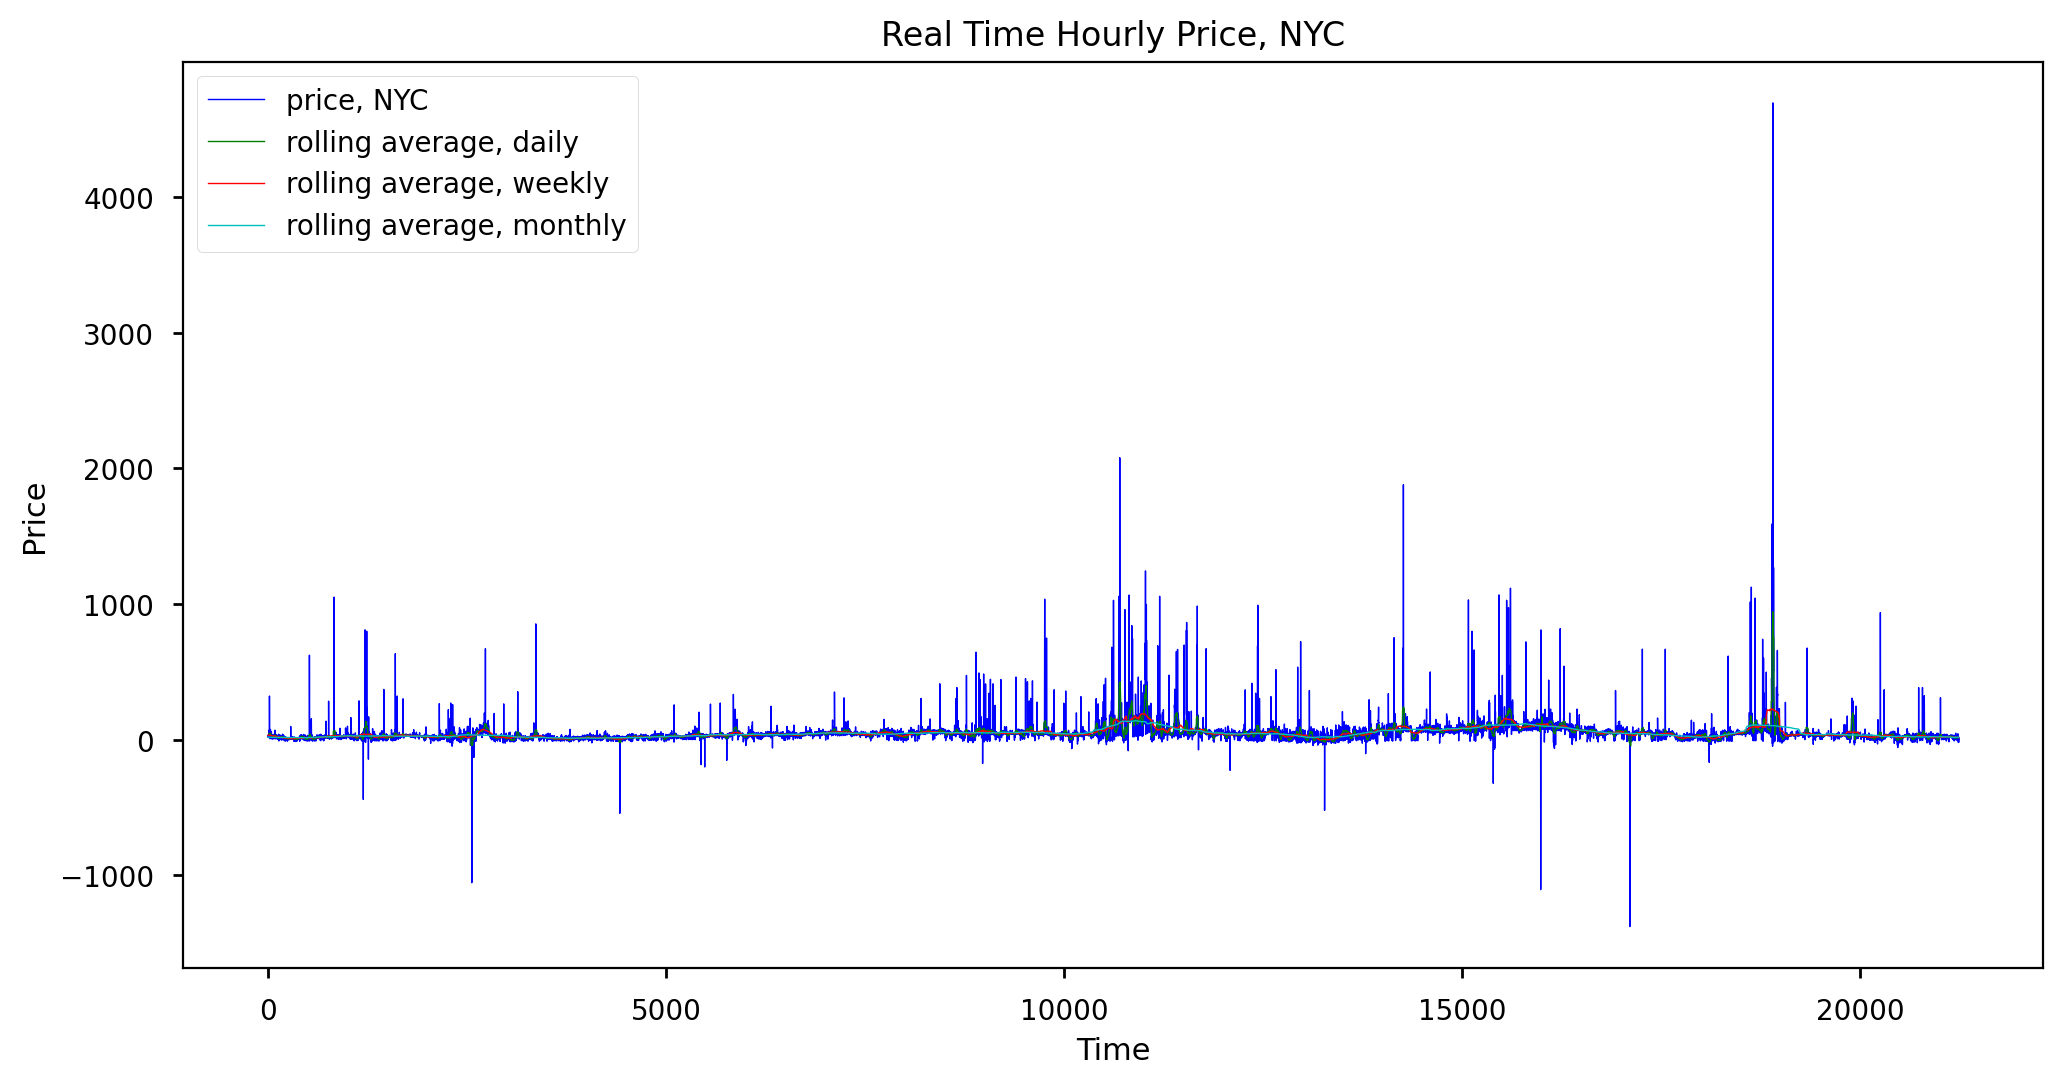

In [41]:
real_rolling_daily = new_data['Real Time Price'].rolling(24, center=True, min_periods=24).mean()
real_rolling_weekly = new_data['Real Time Price'].rolling(24*7, center=True, min_periods=24).mean()
real_rolling_monthly = new_data['Real Time Price'].rolling(24*7*4, center=True, min_periods=24).mean()


plt.figure(figsize=(12,6), dpi=200)
plt.plot(new_data['Real Time Price'], label='price, NYC', linewidth=0.5) 
plt.plot(real_rolling_daily, label='rolling average, daily',linewidth=0.5)
plt.plot(real_rolling_weekly, label='rolling average, weekly',linewidth=0.5)
plt.plot(real_rolling_monthly, label='rolling average, monthly',linewidth=0.5)
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Real Time Hourly Price, NYC')

Text(0.5, 1.0, 'Day Ahead Hourly Price, NYC')

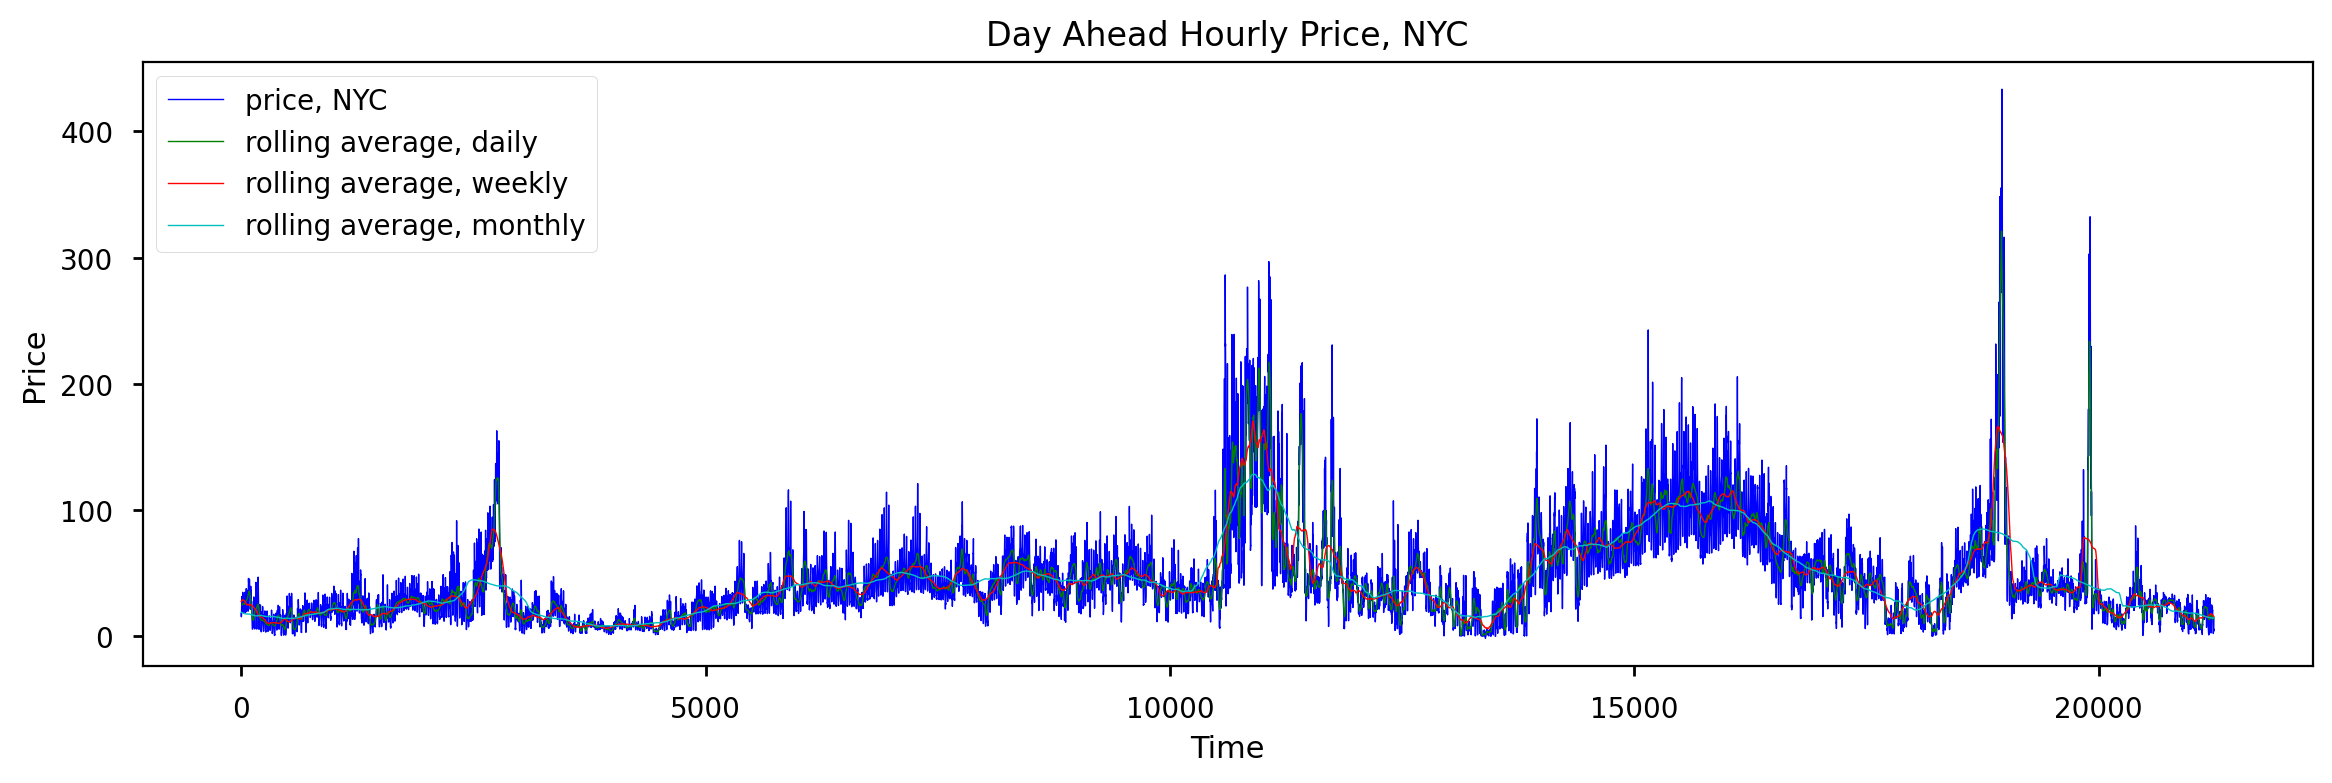

In [42]:
dayahead_rolling_daily = new_data['Day Ahead Price'].rolling(24, center=True, min_periods=24).mean()
dayahead_rolling_weekly = new_data['Day Ahead Price'].rolling(24*7, center=True, min_periods=24).mean()
dayahead_rolling_monthly = new_data['Day Ahead Price'].rolling(24*7*4, center=True, min_periods=24).mean()


plt.figure(figsize=(14,4), dpi=200)
plt.plot(new_data['Day Ahead Price'], label='price, NYC', linewidth=0.5)
plt.plot(dayahead_rolling_daily, label='rolling average, daily',linewidth=0.5)
plt.plot(dayahead_rolling_weekly, label='rolling average, weekly',linewidth=0.5)
plt.plot(dayahead_rolling_monthly, label='rolling average, monthly',linewidth=0.5)
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Day Ahead Hourly Price, NYC')

# **Add d-1, d-7 columns**

In [44]:
data.head()

,Time,Date,Hour,Minute,Holiday,Actual Load,Day Ahead Price,Real Time Price,temp,dwpt,...,weekly_Prec_anom,monthly_Prec_anom,weekly_Wind_anom,monthly_Wind_anom,weekly_Pressure_anom,monthly_Pressure_anom,snowing,raining,hail,cloudy
0,2020-10-27 01:00:00+00:00,2020-10-27,1,0,0,4137.0,17.83,29.69,14.5,13.5,...,-0.056634,-0.172848,-0.977077,-1.187575,-0.447892,0.432928,0,0,0,1
1,2020-10-27 02:00:00+00:00,2020-10-27,2,0,0,3984.0,16.44,22.83,14.4,13.6,...,-0.056634,-0.172848,-1.271174,-1.446107,-0.447892,0.432928,0,0,0,1
2,2020-10-27 03:00:00+00:00,2020-10-27,3,0,0,3895.0,15.45,21.00,14.5,13.6,...,-0.056634,-0.172848,-1.602033,-1.736955,-0.466273,0.416769,0,0,0,1
3,2020-10-27 04:00:00+00:00,2020-10-27,4,0,0,3866.0,16.51,21.90,14.3,13.6,...,-0.056634,-0.172848,-1.032220,-1.236050,-0.484654,0.400611,0,0,0,1
4,2020-10-27 05:00:00+00:00,2020-10-27,5,0,0,3909.0,17.04,23.19,14.3,14.0,...,-0.056634,-0.172848,-1.436603,-1.591531,-0.576560,0.319820,0,0,0,1


In [46]:
#Day ahead prices from 1-day ago at the same hour

for index in range(24,len(data)):
    date_time = data['Time'][index] + timedelta(days=-1)
    
    if date_time in data['Time'].unique():
        data.at[index,'Day ahead d-1'] = data.loc[data['Time']== date_time]['Day Ahead Price'].item()

In [47]:
#Real time prices from 1-day ago at the same hour
#Actual load from 1-day ago at the same hour

for index in range(24,len(data)):
    date_time = data['Time'][index] + timedelta(days=-1)
    
    if date_time in data['Time'].unique():
        data.at[index,'Real time d-1'] = data.loc[data['Time']== date_time]['Real Time Price'].item()
        
        
for index in range(24,len(data)):
    date_time = data['Time'][index] + timedelta(days=-1)
    
    if date_time in data['Time'].unique():
        data.at[index,'Actual load d-1'] = data.loc[data['Time']== date_time]['Actual Load'].item()

In [48]:
data.isna().sum()

Time                      0
Date                      0
Hour                      0
Minute                    0
Holiday                   0
Actual Load               0
Day Ahead Price           0
Real Time Price           0
temp                      0
dwpt                      0
rhum                      0
prcp                      0
wdir                      0
wspd                      0
pres                      0
coco                      0
week                      0
month                     0
weekly_T_anom             0
monthly_T_anom            0
weekly_Prec_anom          0
monthly_Prec_anom         0
weekly_Wind_anom          0
monthly_Wind_anom         0
weekly_Pressure_anom      0
monthly_Pressure_anom     0
snowing                   0
raining                   0
hail                      0
cloudy                    0
Day ahead d-1            44
Real time d-1            44
Actual load d-1          44
dtype: int64

In [66]:
data[data['Day ahead d-1'].isna()]

,Time,Date,Hour,Minute,Holiday,Actual Load,Day Ahead Price,Real Time Price,temp,dwpt,...,monthly_Wind_anom,weekly_Pressure_anom,monthly_Pressure_anom,snowing,raining,hail,cloudy,Day ahead d-1,Real time d-1,Actual load d-1
0,2020-10-27 01:00:00+00:00,2020-10-27,1,0,0,4137.0,17.83,29.69,14.5,13.5,...,-1.187575,-0.447892,0.432928,0,0,0,1,NaN,NaN,NaN
1,2020-10-27 02:00:00+00:00,2020-10-27,2,0,0,3984.0,16.44,22.83,14.4,13.6,...,-1.446107,-0.447892,0.432928,0,0,0,1,NaN,NaN,NaN
2,2020-10-27 03:00:00+00:00,2020-10-27,3,0,0,3895.0,15.45,21.00,14.5,13.6,...,-1.736955,-0.466273,0.416769,0,0,0,1,NaN,NaN,NaN
3,2020-10-27 04:00:00+00:00,2020-10-27,4,0,0,3866.0,16.51,21.90,14.3,13.6,...,-1.236050,-0.484654,0.400611,0,0,0,1,NaN,NaN,NaN
4,2020-10-27 05:00:00+00:00,2020-10-27,5,0,0,3909.0,17.04,23.19,14.3,14.0,...,-1.591531,-0.576560,0.319820,0,0,0,1,NaN,NaN,NaN
5,2020-10-27 06:00:00+00:00,2020-10-27,6,0,0,4121.0,24.41,23.67,14.5,14.1,...,-0.912885,-0.558179,0.335978,0,0,0,1,NaN,NaN,NaN
6,2020-10-27 07:00:00+00:00,2020-10-27,7,0,0,4547.0,30.03,15.17,14.5,14.0,...,-0.864411,-0.539798,0.352137,0,0,0,1,NaN,NaN,NaN
7,2020-10-27 08:00:00+00:00,2020-10-27,8,0,0,4976.0,31.50,29.17,14.2,13.6,...,-0.896727,-0.558179,0.335978,0,0,0,1,NaN,NaN,NaN
8,2020-10-27 09:00:00+00:00,2020-10-27,9,0,0,5271.0,30.60,37.72,14.1,13.4,...,-0.573563,-0.484654,0.400611,0,0,0,1,NaN,NaN,NaN
9,2020-10-27 10:00:00+00:00,2020-10-27,10,0,0,5448.0,29.69,35.90,14.1,13.2,...,-0.508930,-0.411130,0.465244,0,0,0,1,NaN,NaN,NaN


In [82]:
#Some days are missing some hours. On those days I took the earliest available previous day price/load.
#For most of these missing hours, instead of 1-day ago price, 2-days ago price at the same hour is available. 

for i in data[data['Day ahead d-1'].isna()].index[24:]:
    stop = False
    j=1
    while not stop:
        if data['Time'][i] + timedelta(days=-j) in data['Time'].unique():
            data.at[i,'Day ahead d-1'] = data.loc[data['Time']== (data['Time'][i] + timedelta(days=-j))]['Day Ahead Price'].item()
            data.at[i,'Real time d-1'] = data.loc[data['Time']== (data['Time'][i] + timedelta(days=-j))]['Real Time Price'].item()
            data.at[i,'Actual load d-1'] = data.loc[data['Time']== (data['Time'][i] + timedelta(days=-j))]['Actual Load'].item()
            stop = True
        else:
            j+=1

In [83]:
data.isna().sum()

Time                      0
Date                      0
Hour                      0
Minute                    0
Holiday                   0
Actual Load               0
Day Ahead Price           0
Real Time Price           0
temp                      0
dwpt                      0
rhum                      0
prcp                      0
wdir                      0
wspd                      0
pres                      0
coco                      0
week                      0
month                     0
weekly_T_anom             0
monthly_T_anom            0
weekly_Prec_anom          0
monthly_Prec_anom         0
weekly_Wind_anom          0
monthly_Wind_anom         0
weekly_Pressure_anom      0
monthly_Pressure_anom     0
snowing                   0
raining                   0
hail                      0
cloudy                    0
Day ahead d-1            24
Real time d-1            24
Actual load d-1          24
dtype: int64

In [79]:
for i in data[data['Day ahead d-1'].isna()].index[24:]:
    print(data['Time'][i] + timedelta(days=-2) in data['Time'].unique())
    if not data['Time'][i] + timedelta(days=-2) in data['Time'].unique():
        check = data['Time'][i] + timedelta(days=-3) in data['Time'].unique()
        print(f'{i}, 3days:{check}')

True
True
True
True
True
True
True
True
True
True
True
True
False
18942, 3days:True
False
18943, 3days:True
True
True
True
True
True
True


In [84]:
data[data['Day ahead d-1'].isna()]

,Time,Date,Hour,Minute,Holiday,Actual Load,Day Ahead Price,Real Time Price,temp,dwpt,...,monthly_Wind_anom,weekly_Pressure_anom,monthly_Pressure_anom,snowing,raining,hail,cloudy,Day ahead d-1,Real time d-1,Actual load d-1
0,2020-10-27 01:00:00+00:00,2020-10-27,1,0,0,4137.0,17.83,29.69,14.5,13.5,...,-1.187575,-0.447892,0.432928,0,0,0,1,NaN,NaN,NaN
1,2020-10-27 02:00:00+00:00,2020-10-27,2,0,0,3984.0,16.44,22.83,14.4,13.6,...,-1.446107,-0.447892,0.432928,0,0,0,1,NaN,NaN,NaN
2,2020-10-27 03:00:00+00:00,2020-10-27,3,0,0,3895.0,15.45,21.00,14.5,13.6,...,-1.736955,-0.466273,0.416769,0,0,0,1,NaN,NaN,NaN
3,2020-10-27 04:00:00+00:00,2020-10-27,4,0,0,3866.0,16.51,21.90,14.3,13.6,...,-1.236050,-0.484654,0.400611,0,0,0,1,NaN,NaN,NaN
4,2020-10-27 05:00:00+00:00,2020-10-27,5,0,0,3909.0,17.04,23.19,14.3,14.0,...,-1.591531,-0.576560,0.319820,0,0,0,1,NaN,NaN,NaN
5,2020-10-27 06:00:00+00:00,2020-10-27,6,0,0,4121.0,24.41,23.67,14.5,14.1,...,-0.912885,-0.558179,0.335978,0,0,0,1,NaN,NaN,NaN
6,2020-10-27 07:00:00+00:00,2020-10-27,7,0,0,4547.0,30.03,15.17,14.5,14.0,...,-0.864411,-0.539798,0.352137,0,0,0,1,NaN,NaN,NaN
7,2020-10-27 08:00:00+00:00,2020-10-27,8,0,0,4976.0,31.50,29.17,14.2,13.6,...,-0.896727,-0.558179,0.335978,0,0,0,1,NaN,NaN,NaN
8,2020-10-27 09:00:00+00:00,2020-10-27,9,0,0,5271.0,30.60,37.72,14.1,13.4,...,-0.573563,-0.484654,0.400611,0,0,0,1,NaN,NaN,NaN
9,2020-10-27 10:00:00+00:00,2020-10-27,10,0,0,5448.0,29.69,35.90,14.1,13.2,...,-0.508930,-0.411130,0.465244,0,0,0,1,NaN,NaN,NaN


In [86]:
data_nona = data[24:].reset_index()
data_nona

,index,Time,Date,Hour,Minute,Holiday,Actual Load,Day Ahead Price,Real Time Price,temp,...,monthly_Wind_anom,weekly_Pressure_anom,monthly_Pressure_anom,snowing,raining,hail,cloudy,Day ahead d-1,Real time d-1,Actual load d-1
0,24,2020-10-28 01:00:00+00:00,2020-10-28,1,0,0,4099.0,21.07,32.81,13.6,...,-1.656164,-0.080271,0.756092,0,0,0,1,17.83,29.69,4137.0
1,25,2020-10-28 02:00:00+00:00,2020-10-28,2,0,0,3938.0,19.90,11.11,13.4,...,-0.363506,-0.006747,0.820725,0,0,0,1,16.44,22.83,3984.0
2,26,2020-10-28 03:00:00+00:00,2020-10-28,3,0,0,3828.0,18.60,19.89,13.0,...,-0.541246,-0.006747,0.820725,0,1,0,1,15.45,21.00,3895.0
3,27,2020-10-28 04:00:00+00:00,2020-10-28,4,0,0,3797.0,19.96,5.89,12.8,...,-0.525088,-0.153795,0.691459,0,0,0,1,16.51,21.90,3866.0
4,28,2020-10-28 05:00:00+00:00,2020-10-28,5,0,0,3838.0,21.16,21.84,12.4,...,-1.349157,-0.264082,0.594510,0,1,0,1,17.04,23.19,3909.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25610,25634,2023-10-01 01:00:00+00:00,2023-10-01,1,0,0,4266.0,23.76,24.30,17.5,...,-0.374342,0.550189,0.976217,0,0,0,0,23.20,27.72,4217.0
25611,25635,2023-10-01 02:00:00+00:00,2023-10-01,2,0,0,4075.0,20.98,22.38,17.6,...,-0.412066,0.550189,0.976217,0,0,0,0,21.24,24.00,4032.0
25612,25636,2023-10-01 03:00:00+00:00,2023-10-01,3,0,0,3974.0,20.76,22.18,16.8,...,-0.487515,0.530091,0.957355,0,0,0,0,20.41,23.35,3894.0
25613,25637,2023-10-01 04:00:00+00:00,2023-10-01,4,0,0,3875.0,19.29,17.93,16.5,...,-0.317756,0.550189,0.976217,0,0,0,0,20.64,19.41,3816.0


In [88]:
data_nona = data_nona.drop('index', axis=1)
data_nona

,Time,Date,Hour,Minute,Holiday,Actual Load,Day Ahead Price,Real Time Price,temp,dwpt,...,monthly_Wind_anom,weekly_Pressure_anom,monthly_Pressure_anom,snowing,raining,hail,cloudy,Day ahead d-1,Real time d-1,Actual load d-1
0,2020-10-28 01:00:00+00:00,2020-10-28,1,0,0,4099.0,21.07,32.81,13.6,6.3,...,-1.656164,-0.080271,0.756092,0,0,0,1,17.83,29.69,4137.0
1,2020-10-28 02:00:00+00:00,2020-10-28,2,0,0,3938.0,19.90,11.11,13.4,6.4,...,-0.363506,-0.006747,0.820725,0,0,0,1,16.44,22.83,3984.0
2,2020-10-28 03:00:00+00:00,2020-10-28,3,0,0,3828.0,18.60,19.89,13.0,6.1,...,-0.541246,-0.006747,0.820725,0,1,0,1,15.45,21.00,3895.0
3,2020-10-28 04:00:00+00:00,2020-10-28,4,0,0,3797.0,19.96,5.89,12.8,5.8,...,-0.525088,-0.153795,0.691459,0,0,0,1,16.51,21.90,3866.0
4,2020-10-28 05:00:00+00:00,2020-10-28,5,0,0,3838.0,21.16,21.84,12.4,6.2,...,-1.349157,-0.264082,0.594510,0,1,0,1,17.04,23.19,3909.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25610,2023-10-01 01:00:00+00:00,2023-10-01,1,0,0,4266.0,23.76,24.30,17.5,14.6,...,-0.374342,0.550189,0.976217,0,0,0,0,23.20,27.72,4217.0
25611,2023-10-01 02:00:00+00:00,2023-10-01,2,0,0,4075.0,20.98,22.38,17.6,14.4,...,-0.412066,0.550189,0.976217,0,0,0,0,21.24,24.00,4032.0
25612,2023-10-01 03:00:00+00:00,2023-10-01,3,0,0,3974.0,20.76,22.18,16.8,14.4,...,-0.487515,0.530091,0.957355,0,0,0,0,20.41,23.35,3894.0
25613,2023-10-01 04:00:00+00:00,2023-10-01,4,0,0,3875.0,19.29,17.93,16.5,14.3,...,-0.317756,0.550189,0.976217,0,0,0,0,20.64,19.41,3816.0


In [98]:
for index in range(24*7-1,len(data)):
    date_time = data['Time'][index] + timedelta(days=-7)
    
    if date_time in data['Time'].unique():
        data.at[index,'Day ahead d-7'] = data.loc[data['Time']== date_time]['Day Ahead Price'].item()

for index in range(24*7-1,len(data)):
    date_time = data['Time'][index] + timedelta(days=-7)
    
    if date_time in data['Time'].unique():
        data.at[index,'Real time d-7'] = data.loc[data['Time']== date_time]['Real Time Price'].item()
        
        
for index in range(24*7-1,len(data)):
    date_time = data['Time'][index] + timedelta(days=-7)
    
    if date_time in data['Time'].unique():
        data.at[index,'Actual load d-7'] = data.loc[data['Time']== date_time]['Actual Load'].item()

In [99]:
data.isna().sum()

Time                       0
Date                       0
Hour                       0
Minute                     0
Holiday                    0
Actual Load                0
Day Ahead Price            0
Real Time Price            0
temp                       0
dwpt                       0
rhum                       0
prcp                       0
wdir                       0
wspd                       0
pres                       0
coco                       0
week                       0
month                      0
weekly_T_anom              0
monthly_T_anom             0
weekly_Prec_anom           0
monthly_Prec_anom          0
weekly_Wind_anom           0
monthly_Wind_anom          0
weekly_Pressure_anom       0
monthly_Pressure_anom      0
snowing                    0
raining                    0
hail                       0
cloudy                     0
Day ahead d-1             24
Real time d-1             24
Actual load d-1           24
Day ahead d-7            189
Real time d-7 

In [113]:
data[data['Day ahead d-7'].isna()].index 

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            19062, 19063, 19086, 19087, 20069, 20165, 20933, 20934, 21818,
            24625],
           dtype='int64', length=189)

In [128]:
for i in data[data['Day ahead d-7'].isna()].index[24*7-1:]:
    print(data['Time'][i] + timedelta(days=-8) in data['Time'].unique())
    if not data['Time'][i] + timedelta(days=-8) in data['Time'].unique():
        check = data['Time'][i] + timedelta(days=-9) in data['Time'].unique()
        print(f'{i}, 9days:{check}')

True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
19086, 9days:True
False
19087, 9days:True
True
True
True
True
True
True


In [131]:
#Some days are missing some hours. On those days I took the earliest available previous week price/load.
#For most of these missing hours, instead of 7-day ago price, 8-days ago price at the same hour is available. 

for i in data[data['Day ahead d-7'].isna()].index[24*7-1:]:
    stop = False
    j=8
    while not stop:
        if data['Time'][i] + timedelta(days=-j) in data['Time'].unique():
            data.at[i,'Day ahead d-7'] = data.loc[data['Time']== (data['Time'][i] + timedelta(days=-j))]['Day Ahead Price'].item()
            data.at[i,'Real time d-7'] = data.loc[data['Time']== (data['Time'][i] + timedelta(days=-j))]['Real Time Price'].item()
            data.at[i,'Actual load d-7'] = data.loc[data['Time']== (data['Time'][i] + timedelta(days=-j))]['Actual Load'].item()
            stop = True
        else:
            j+=1

In [132]:
data.isna().sum()

Time                       0
Date                       0
Hour                       0
Minute                     0
Holiday                    0
Actual Load                0
Day Ahead Price            0
Real Time Price            0
temp                       0
dwpt                       0
rhum                       0
prcp                       0
wdir                       0
wspd                       0
pres                       0
coco                       0
week                       0
month                      0
weekly_T_anom              0
monthly_T_anom             0
weekly_Prec_anom           0
monthly_Prec_anom          0
weekly_Wind_anom           0
monthly_Wind_anom          0
weekly_Pressure_anom       0
monthly_Pressure_anom      0
snowing                    0
raining                    0
hail                       0
cloudy                     0
Day ahead d-1             24
Real time d-1             24
Actual load d-1           24
Day ahead d-7            167
Real time d-7 

In [154]:
data.to_csv('final_data_withna.csv')

In [150]:
data_nona = data[167:]
data_nona = data_nona.reset_index()
data_nona = data_nona.drop('index', axis=1)
data_nona

,Time,Date,Hour,Minute,Holiday,Actual Load,Day Ahead Price,Real Time Price,temp,dwpt,...,snowing,raining,hail,cloudy,Day ahead d-1,Real time d-1,Actual load d-1,Day ahead d-7,Real time d-7,Actual load d-7
0,2020-11-03 01:00:00+00:00,2020-11-03,1,0,0,4339.0,5.78,-2.38,5.4,-5.4,...,0,0,0,0,10.62,-3.23,4166.0,17.83,29.69,4137.0
1,2020-11-03 02:00:00+00:00,2020-11-03,2,0,0,4204.0,5.76,21.98,5.1,-4.7,...,0,0,0,0,8.46,-2.38,4040.0,16.44,22.83,3984.0
2,2020-11-03 03:00:00+00:00,2020-11-03,3,0,0,4118.0,5.76,13.68,4.6,-4.4,...,0,0,0,0,8.75,-3.35,3954.0,15.45,21.00,3895.0
3,2020-11-03 04:00:00+00:00,2020-11-03,4,0,0,4109.0,5.77,11.65,4.5,-4.6,...,0,0,0,0,5.78,19.98,3982.0,16.51,21.90,3866.0
4,2020-11-03 05:00:00+00:00,2020-11-03,5,0,0,4179.0,8.82,-1.60,4.2,-4.2,...,0,0,0,0,8.77,1.90,4051.0,17.04,23.19,3909.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25467,2023-10-01 01:00:00+00:00,2023-10-01,1,0,0,4266.0,23.76,24.30,17.5,14.6,...,0,0,0,0,23.20,27.72,4217.0,14.77,19.84,4268.0
25468,2023-10-01 02:00:00+00:00,2023-10-01,2,0,0,4075.0,20.98,22.38,17.6,14.4,...,0,0,0,0,21.24,24.00,4032.0,13.84,16.87,4090.0
25469,2023-10-01 03:00:00+00:00,2023-10-01,3,0,0,3974.0,20.76,22.18,16.8,14.4,...,0,0,0,0,20.41,23.35,3894.0,11.95,13.66,3956.0
25470,2023-10-01 04:00:00+00:00,2023-10-01,4,0,0,3875.0,19.29,17.93,16.5,14.3,...,0,0,0,0,20.64,19.41,3816.0,11.81,13.59,3899.0


In [155]:
data_nona.to_csv('final_data_nona.csv')